# Домашнее задание NN-3


### Импорт библиотек

In [ ]:
# !pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nv

In [ ]:
import torch
from torch import nn
from torchviz import make_dot

### Сеть 1

In [ ]:
class Net1(nn.Module):
    def __init__(self, latent_dim=2):
        super().__init__()
        self.encode = nn.Sequential(
            nn.Linear(784, 500),
            nn.Linear(500, 300),
            nn.Linear(300, latent_dim)
        )
        self.decode = nn.Sequential(
            nn.Linear(latent_dim, 300),
            nn.Linear(300, 500),
            nn.Linear(500, 784)
        )

    def forward(self, input):
        output = self.decode(self.encode(input))
        return output



In [ ]:
model1 = Net1()

In [ ]:
model1

Net1(
  (encode): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): Linear(in_features=500, out_features=300, bias=True)
    (2): Linear(in_features=300, out_features=2, bias=True)
  )
  (decode): Sequential(
    (0): Linear(in_features=2, out_features=300, bias=True)
    (1): Linear(in_features=300, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=784, bias=True)
  )
)

In [ ]:
output = model1(torch.rand(784))
output.shape

torch.Size([784])

### Сеть 2

In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 5)
        self.relu = nn.ReLU()
        self.linear3 = nn.Linear(5, 1)

    def forward(self, input):
        output = self.linear1(input)
        output = self.relu(output)
        output = self.linear3(output)
        return output

In [ ]:
model2 = Net2()

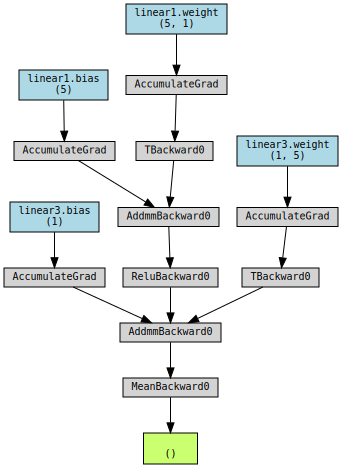

In [ ]:
x = torch.randn(5, 1)
y = model2(x)

make_dot(y.mean(), params=dict(model2.named_parameters()))


### Сеть 3

In [ ]:
class Net3(nn.Module):
    def __init__(self, in_channels=1):
        super().__init__()

        self.conv_pool_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=(5, 5), stride=1),
            nn.MaxPool2d(kernel_size=(2, 2), padding=0)
        )
        self.conv_pool_2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=1),
            nn.MaxPool2d(kernel_size=(2, 2), padding=0)
        )
        self.flatten = nn.Flatten(0)
        self.out = nn.Sequential(
            nn.Linear(5 * 5 * 16, 120),
            nn.Linear(120, 84),
            nn.Linear(84, 10)
        )


    def forward(self, input):
        o = self.conv_pool_1(input)
        o = self.conv_pool_2(o)
        o = self.flatten(o)
        o = self.out(o)
        return o

In [ ]:
model3 = Net3()

In [ ]:
model3

Net3(
  (conv_pool_1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_pool_2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=0, end_dim=-1)
  (out): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=84, bias=True)
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [ ]:
output = model3(torch.rand(1, 32, 32))

In [ ]:
output.shape

torch.Size([10])